In [182]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

## Approach:-
#### ->Since in this dataset, there are not many given features . This competition is more about feature engineering,how many feature can be created,I dint create a lot of features becuz of time. But still here is my approach

## Features:-
#### 1 - Time taken in each session in mins (end_time - start_time)
#### 2 - Total number of products browsed in a session
#### 3 - Average time taken for each product (Feature_1 / Feature_2)
#### 4,5,6 - Day,month,hours of the browsing sessions
#### 5 - Total number categories browsed in a session(e.g A00001- 5 times, A00002- 3 times...etc)
#### 6 - Similarly like feature 5 , total number of sub categories
#### 7 - Simliarly like feature 6 , total number of sub sub categories
#### 8 - First item browsed in a session , This turned out to be a good feature in prediction.( I was reading about male and female online shopping habits , both start shopping session by clicking in an impulsive way,like female will tend to first click on female products like bangles,lipsticks etc , not on male stuffs genrally)

## FInal Thoughts
#### When i get time i ll be adding more features,also read other peoples' approach
#### As of now, with this approach got Local Validation score 0.8657,Public Leaderboard score 0.8744, Rank 41
#### This Notebook , i have only covered basic EDA , in the end basic Model
#### The final model is in the other python file in this directory (** type python e_commerce.py **)
#### Stacking somehow dint seem to give a increase in accuracy
#### Feature Selecting upto 150 features using RFECV somehow increased the accuarcy .

In [2]:
train_data = pd.read_csv('data/train_8wry4cB.csv')
test_data = pd.read_csv('data/test_Yix80N0.csv')

In [183]:
train_data.head()

,session_id,startTime,endTime,ProductList,gender
0,u16159,15/12/14 18:11,15/12/14 18:12,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,female
1,u10253,16/12/14 14:35,16/12/14 14:41,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,male
2,u19037,01/12/14 15:58,01/12/14 15:58,A00002/B00001/C00020/D16944/,female
3,u14556,23/11/14 2:57,23/11/14 3:00,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,female
4,u24295,17/12/14 16:44,17/12/14 16:46,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,male


In [5]:
merge_data = pd.concat([train_data,test_data])
merge_data = merge_data[train_data.columns]

C:\Anaconda\envs\tf-pt-36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [6]:
merge_data = merge_data[train_data.columns]

In [8]:
merge_data.head()

,session_id,startTime,endTime,ProductList,gender
0,u16159,15/12/14 18:11,15/12/14 18:12,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,female
1,u10253,16/12/14 14:35,16/12/14 14:41,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,male
2,u19037,01/12/14 15:58,01/12/14 15:58,A00002/B00001/C00020/D16944/,female
3,u14556,23/11/14 2:57,23/11/14 3:00,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,female
4,u24295,17/12/14 16:44,17/12/14 16:46,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,male


In [18]:
merge_data.isna().sum()

session_id        0
startTime         0
endTime           0
ProductList       0
gender         4500
dtype: int64

In [188]:
merge_data.startTime = pd.to_datetime(merge_data.startTime)
merge_data.endTime = pd.to_datetime(merge_data.endTime)


In [185]:
merge_data['no_of_products_viewed'] = merge_data.ProductList.apply(lambda x:len(x.split(';')))

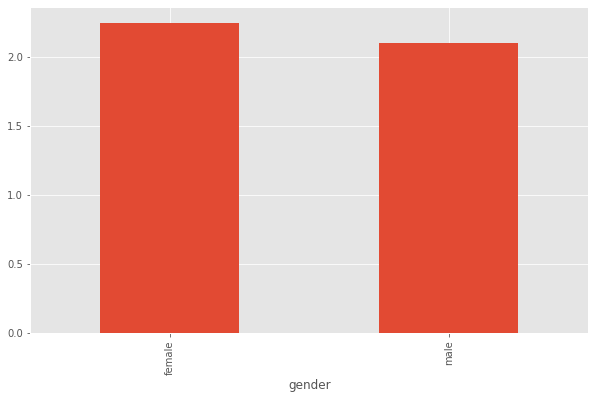

In [189]:
plt.style.use('ggplot')
merge_data[:len(train_data)].groupby(['gender']).no_of_products_viewed.mean().plot(kind='bar',figsize=(10,6))

### Almost same, females tend to browse more products

In [190]:
merge_data['session_duration'] = (merge_data.endTime - merge_data.startTime).apply(lambda x:x.seconds // 60)


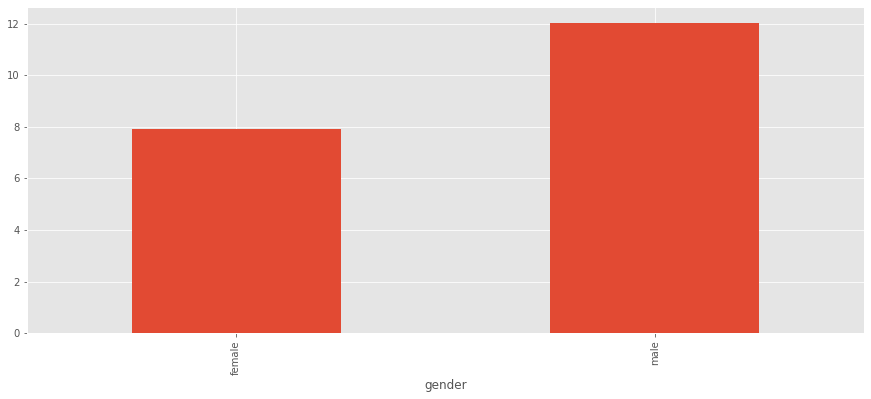

In [193]:
merge_data.groupby(['gender']).session_duration.mean().plot(kind='bar',figsize=(15,6))

### Strange!!! male on average used to browse for a long time...may be they are confused about what to buy

In [111]:
merge_data.head()

,session_id,startTime,endTime,ProductList,gender,no_of_products_viewed,session_duration
0,u16159,2014-12-15 18:11:00,2014-12-15 18:12:00,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,female,4,1
1,u10253,2014-12-16 14:35:00,2014-12-16 14:41:00,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,male,7,6
2,u19037,2014-01-12 15:58:00,2014-01-12 15:58:00,A00002/B00001/C00020/D16944/,female,1,0
3,u14556,2014-11-23 02:57:00,2014-11-23 03:00:00,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,female,3,3
4,u24295,2014-12-17 16:44:00,2014-12-17 16:46:00,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,male,2,2


In [7]:
def category_bin(data,num):
    category_list = set()
    for i in data.values:
        for j in i.split(';'):
            category_list.add(j.split('/')[num])
    return(category_list)
    

#### Creating  category bins containing unique category,sub cat,sub sub cat resptively

In [9]:
category_set = category_bin(merge_data.ProductList,0)
sub_category_set = category_bin(merge_data.ProductList,1)
sub_sub_category_set = category_bin(merge_data.ProductList,2)

In [10]:
sub_sub_category_set

{'C00001',
 'C00002',
 'C00003',
 'C00004',
 'C00005',
 'C00006',
 'C00007',
 'C00008',
 'C00009',
 'C00010',
 'C00011',
 'C00012',
 'C00013',
 'C00014',
 'C00015',
 'C00016',
 'C00017',
 'C00018',
 'C00019',
 'C00020',
 'C00021',
 'C00022',
 'C00023',
 'C00024',
 'C00025',
 'C00026',
 'C00027',
 'C00028',
 'C00029',
 'C00030',
 'C00031',
 'C00032',
 'C00033',
 'C00034',
 'C00035',
 'C00036',
 'C00037',
 'C00038',
 'C00039',
 'C00040',
 'C00041',
 'C00042',
 'C00043',
 'C00044',
 'C00045',
 'C00046',
 'C00047',
 'C00048',
 'C00049',
 'C00050',
 'C00051',
 'C00052',
 'C00053',
 'C00054',
 'C00055',
 'C00056',
 'C00057',
 'C00058',
 'C00059',
 'C00060',
 'C00061',
 'C00062',
 'C00063',
 'C00064',
 'C00065',
 'C00066',
 'C00067',
 'C00068',
 'C00069',
 'C00070',
 'C00071',
 'C00073',
 'C00074',
 'C00075',
 'C00076',
 'C00077',
 'C00078',
 'C00079',
 'C00080',
 'C00081',
 'C00082',
 'C00083',
 'C00084',
 'C00085',
 'C00086',
 'C00087',
 'C00088',
 'C00089',
 'C00091',
 'C00092',
 'C00093',

#### Adding new features that shows the number of times the category has been browsed per session

In [173]:
#### Adding more columns product category wise
for i in list(category_set):
    merge_data[i] = 0


In [11]:
def total_category_browsed(data):
    count_dic = {}
    for i in category_set:
        count_dic[i] = 0
    for i in data.split(';'):
        count_dic[i.split('/')[0]] += 1
    return(pd.Series(count_dic))

In [12]:
pd.Series(total_category_browsed(merge_data.ProductList.iloc[0]))

A00006    0
A00005    0
A00011    0
A00002    4
A00001    0
A00010    0
A00007    0
A00004    0
A00003    0
A00009    0
A00008    0
dtype: int64

In [14]:
merge_data.head()

,session_id,startTime,endTime,ProductList,gender
0,u16159,15/12/14 18:11,15/12/14 18:12,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,female
1,u10253,16/12/14 14:35,16/12/14 14:41,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,male
2,u19037,01/12/14 15:58,01/12/14 15:58,A00002/B00001/C00020/D16944/,female
3,u14556,23/11/14 2:57,23/11/14 3:00,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,female
4,u24295,17/12/14 16:44,17/12/14 16:46,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,male


In [199]:
merge_data.ProductList.head().apply(total_category_browsed)

,A00002,A00003,A00004,A00010,A00001,A00011,A00007,A00005,A00006,A00009,A00008
0,4,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,7,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,2,0,0,0,0,0,0


In [202]:
merge_data.iloc[:,7:] = merge_data.ProductList.apply(total_category_browsed)

In [203]:
merge_data.head(10)

,session_id,startTime,endTime,ProductList,gender,no_of_products_viewed,session_duration,A00002,A00003,A00004,A00010,A00001,A00011,A00007,A00005,A00006,A00009,A00008
0,u16159,2014-12-15 18:11:00,2014-12-15 18:12:00,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,female,4,1,4,0,0,0,0,0,0,0,0,0,0
1,u10253,2014-12-16 14:35:00,2014-12-16 14:41:00,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,male,7,6,0,0,0,0,7,0,0,0,0,0,0
2,u19037,2014-01-12 15:58:00,2014-01-12 15:58:00,A00002/B00001/C00020/D16944/,female,1,0,1,0,0,0,0,0,0,0,0,0,0
3,u14556,2014-11-23 02:57:00,2014-11-23 03:00:00,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,female,3,3,3,0,0,0,0,0,0,0,0,0,0
4,u24295,2014-12-17 16:44:00,2014-12-17 16:46:00,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,male,2,2,0,0,0,0,2,0,0,0,0,0,0
5,u20964,2014-12-12 15:31:00,2014-12-12 15:31:00,A00002/B00002/C00081/D25039/,female,1,0,1,0,0,0,0,0,0,0,0,0,0
6,u20981,2014-05-12 19:33:00,2014-05-12 19:34:00,A00002/B00011/C00180/D18487/;A00002/B00011/C00...,female,2,1,2,0,0,0,0,0,0,0,0,0,0
7,u15947,2014-09-12 16:02:00,2014-09-12 16:06:00,A00002/B00001/C00059/D15254/;A00002/B00001/C00...,male,3,4,3,0,0,0,0,0,0,0,0,0,0
8,u18193,2014-11-25 11:55:00,2014-11-25 11:55:00,A00002/B00001/C00010/D06129/,male,1,0,1,0,0,0,0,0,0,0,0,0,0
9,u21820,2014-06-12 16:16:00,2014-06-12 16:17:00,A00002/B00001/C00010/D12841/;A00002/B00002/C00...,female,2,1,2,0,0,0,0,0,0,0,0,0,0


In [212]:
merge_data.groupby(['gender']).A00002.mean().

gender
female    1.647217
male      0.622617
Name: A00002, dtype: float64

In [216]:
merge_data.groupby(['gender']).A00001.mean()

gender
female    0.077393
male      1.155113
Name: A00001, dtype: float64

### A very clear distiction between gender based on categories(A00001 etc) they browse

In [215]:
# I believe count sometimes can not be effective indicators, lets say a female browsing A02 5/5 times , is not equivalent to 
# a male browsing A02 5/50 times, so i ll normalize across the Categories

In [234]:
test = merge_data.iloc[:,7:].sum(axis=1)
merge_data.iloc[:,7:] = merge_data.iloc[:,7:].div(test,axis=0)

In [236]:
merge_data.head()

,session_id,startTime,endTime,ProductList,gender,no_of_products_viewed,session_duration,A00002,A00003,A00004,A00010,A00001,A00011,A00007,A00005,A00006,A00009,A00008
0,u16159,2014-12-15 18:11:00,2014-12-15 18:12:00,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,female,4,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,u10253,2014-12-16 14:35:00,2014-12-16 14:41:00,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,male,7,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,u19037,2014-01-12 15:58:00,2014-01-12 15:58:00,A00002/B00001/C00020/D16944/,female,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,u14556,2014-11-23 02:57:00,2014-11-23 03:00:00,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,female,3,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,u24295,2014-12-17 16:44:00,2014-12-17 16:46:00,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,male,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [239]:
merge_data.groupby(['gender']).A00002.mean()

gender
female    0.733695
male      0.311803
Name: A00002, dtype: float64

In [196]:
merge_data['hour'] = merge_data.startTime.dt.hour

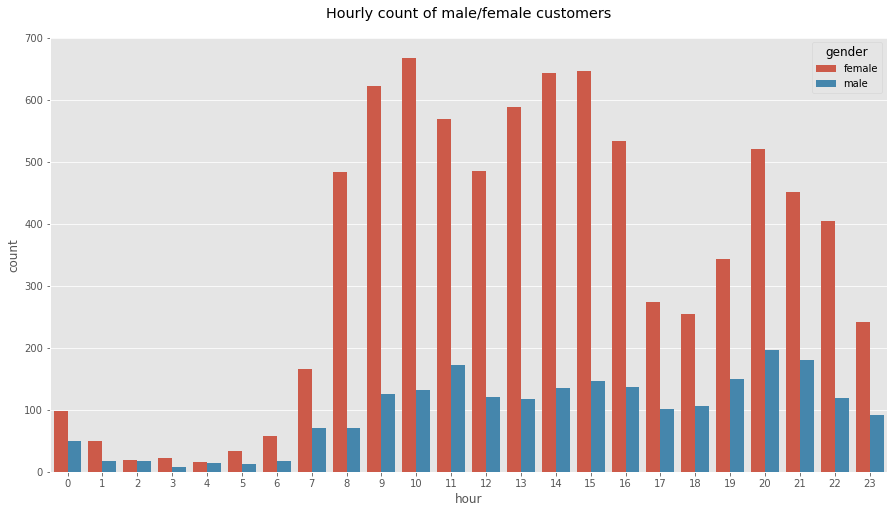

In [199]:
plt.figure(figsize=(15,8))
sns.countplot(x='hour',data=merge_data,hue='gender')
plt.title('Hourly count of male/female customers',y=1.03)
plt.show()

### Men have a vary flat browsing session from 8 am  11 pm .... but women do have some peaks

In [200]:
merge_data['weekday'] = merge_data.startTime.dt.weekday

Text(0.5, 1.0, 'Daily counts of Male/Female customers')

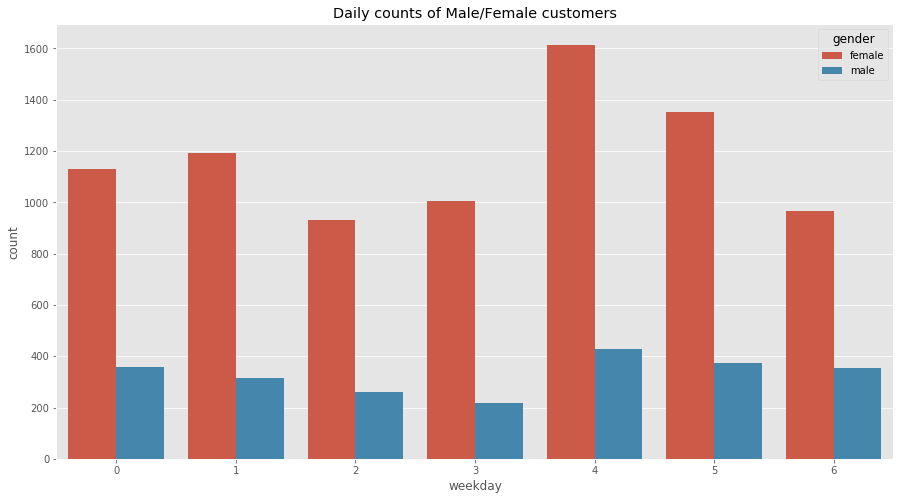

In [201]:
plt.figure(figsize=(15,8))
sns.countplot(x='weekday',data=merge_data,hue='gender')
plt.title('Daily counts of Male/Female customers')

#### Clearly a sign where both male and female do shop more on weekends(4,5,6)
#### Everybody loves weekends...

In [258]:
merge_data.head()

,session_id,startTime,endTime,ProductList,gender,no_of_products_viewed,session_duration,A00002,A00003,A00004,A00010,A00001,A00011,A00007,A00005,A00006,A00009,A00008,hour,weekday
0,u16159,2014-12-15 18:11:00,2014-12-15 18:12:00,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,female,4,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18,0
1,u10253,2014-12-16 14:35:00,2014-12-16 14:41:00,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,male,7,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,14,1
2,u19037,2014-01-12 15:58:00,2014-01-12 15:58:00,A00002/B00001/C00020/D16944/,female,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15,6
3,u14556,2014-11-23 02:57:00,2014-11-23 03:00:00,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,female,3,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,6
4,u24295,2014-12-17 16:44:00,2014-12-17 16:46:00,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,male,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,16,2


Text(0.5, 1.0, 'Monthly counts of Male/Female customers')

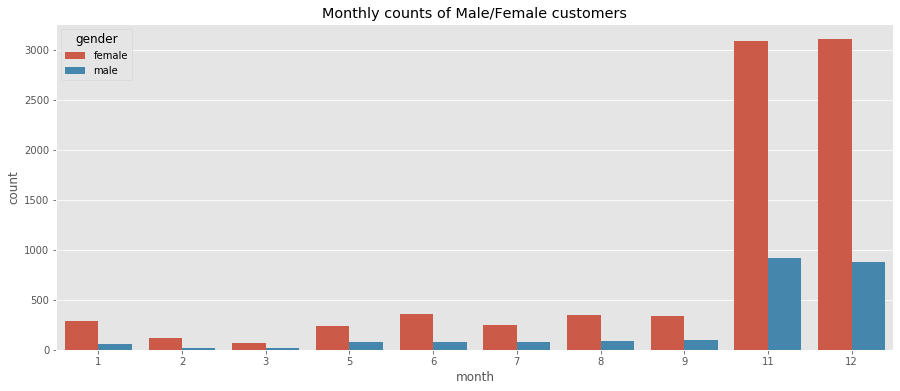

In [202]:
merge_data['month'] = merge_data.startTime.dt.month
plt.figure(figsize=(15,6))
sns.countplot(x='month',data=merge_data,hue='gender')
plt.title('Monthly counts of Male/Female customers')

#### Looks like everybody waits for November and December to shop,may be lot of season discount offers at this time

In [203]:
#Just like category, this fn counts the total number of sub cats browsed in a session
def total_sub_category_browsed(data):
    count_dic = {}
    for i in sub_category_set:
        count_dic[i] = 0
    for i in data.split(';'):
        count_dic[i.split('/')[1]] += 1
    return(pd.Series(count_dic))

In [204]:
def total_sub_sub_category_browsed(data):
    count_dic = {}
    for i in sub_sub_category_set:
        count_dic[i] = 0
    for i in data.split(';'):
        count_dic[i.split('/')[2]] += 1
    return(pd.Series(count_dic))

In [205]:
merge_data_bkp = merge_data.copy()

In [206]:
merge_data = merge_data_bkp.copy()

In [207]:
for i in sub_category_set:
    merge_data[i] = 0

In [208]:
merge_data.iloc[:,-86:].head()

,B00040,B00042,B00085,B00033,B00089,B00005,B00032,B00030,B00088,B00029,...,B00057,B00011,B00079,B00015,B00045,B00072,B00036,B00078,B00007,B00009
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [209]:
merge_data.iloc[:,-86:] = merge_data.ProductList.apply(total_sub_category_browsed)

In [216]:
merge_data.head()

,session_id,startTime,endTime,ProductList,gender,no_of_products_viewed,session_duration,hour,weekday,month,...,B00057,B00011,B00079,B00015,B00045,B00072,B00036,B00078,B00007,B00009
0,u16159,2014-12-15 18:11:00,2014-12-15 18:12:00,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,female,4,1,18,0,12,...,0,0,0,0,0,0,0,0,0,0
1,u10253,2014-12-16 14:35:00,2014-12-16 14:41:00,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,male,7,6,14,1,12,...,0,0,0,0,0,0,0,0,0,7
2,u19037,2014-01-12 15:58:00,2014-01-12 15:58:00,A00002/B00001/C00020/D16944/,female,1,0,15,6,1,...,0,0,0,0,0,0,0,0,0,0
3,u14556,2014-11-23 02:57:00,2014-11-23 03:00:00,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,female,3,3,2,6,11,...,0,0,0,0,0,0,0,0,0,0
4,u24295,2014-12-17 16:44:00,2014-12-17 16:46:00,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,male,2,2,16,2,12,...,0,0,0,0,0,0,0,0,0,0


In [217]:
merge_data.groupby(['gender']).B00007.mean()

gender
female    0.151245
male      0.054593
Name: B00007, dtype: float64

In [218]:
merge_data.to_pickle('merged_data.pickle')

In [219]:
data = merge_data.drop(columns=['startTime','endTime','session_id','ProductList'])
data = pd.get_dummies(columns=['month','weekday','hour'],data=data,drop_first=True)

In [220]:
data.head()

,gender,no_of_products_viewed,session_duration,B00040,B00042,B00085,B00033,B00089,B00005,B00032,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,female,4,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,male,7,6,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,female,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,female,3,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,male,2,2,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [221]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,f1_score

In [222]:
data.gender = data.gender.map({'female':1,'male':0})

In [223]:
trainset = data[:len(train_data)]
testset = data[len(train_data):].drop(columns=['gender'])

In [224]:
X = trainset.drop(columns=['gender'])
y = trainset['gender']

In [225]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=123)

In [226]:
model = lgb.LGBMClassifier()
model.fit(X_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [227]:
model.score(X_test,y_test)

0.8252380952380952

In [352]:
def create_csv(model):
    y_pred = model.predict(testset)
    prediction = pd.DataFrame({'session_id':test_data.session_id,'gender':y_pred})
    prediction.gender = prediction.gender.map({1:'female',0:'male'})
    prediction.to_csv('submission.csv',index=False)

In [353]:
create_csv(model)

Text(0.5, 1.0, 'Feature_importances')

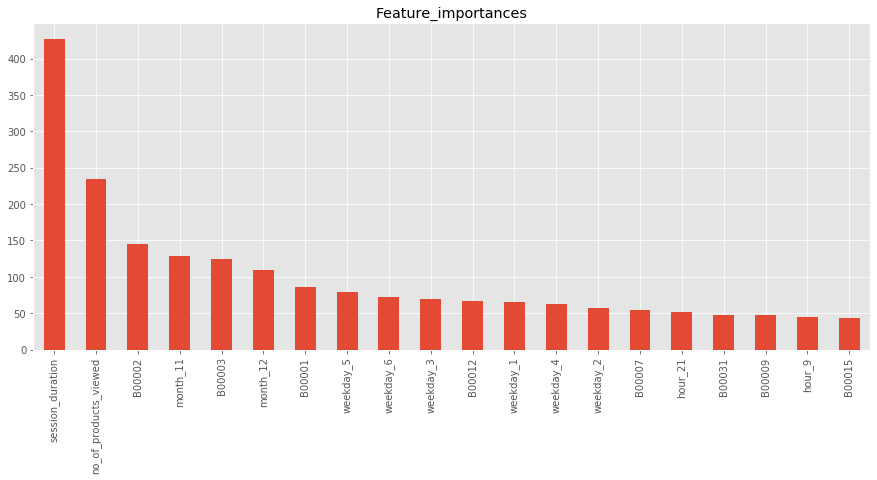

In [229]:
pd.Series(dict(zip(X.columns.tolist(),model.feature_importances_))).sort_values(ascending=False).head(20).plot(kind='bar',figsize=(15,6))
plt.title('Feature_importances')

###  ****This is just  a basic assessment of the problem****

### **For final model,data preprocessing and reproducing the results please refer the e_commerce.py file**

#### Would be glad to hear your thoughts and feedback on dibyaj46@gmail.com